# Tema 2 - Taxi Driver

### Autori: 
* George Muraru


## 2. Scopul temei

Tema are ca scop folosirea unor tehnici simple de reinforcement learning pentru a realiza un bot care "știe" să realizeze o sarcină simplă: să transporte o persoană dintr-o locație în alta.

Mai multe detalii despre joc se pot găsi [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py) și [aici](https://gym.openai.com/envs/Taxi-v3/).

## 3. Workspace Setup

Pentru environmentul de joc, vom folosi "Gym" - un tool oferit de OpenAI pentru Reinforcement Learning.

Mai multe detalii puteți găsi [aici](https://gym.openai.com/).

### Dependețe

In [102]:
!pip install -U gym

Requirement already up-to-date: gym in /usr/local/lib/python3.7/dist-packages (0.18.0)


### Import biblioteci

In [103]:
import gym
import seaborn as sns
import numpy as np

# Set seaborn plotting type
sns.set()


import random
import time
from IPython.display import clear_output

### Setup Environment pentru Taxi

In [104]:
env = gym.make('Taxi-v3')

### Parametrii

In [105]:
LOG_INTERVAL = 100 #@param {type: "slider", min: 0, max: 1000, step: 10}
NR_EPISODES = 2000 #@param {type: "slider", min: 5, max: 10000, step: 5}



### Hyperparametrii

In [106]:
ALPHA = 0.1 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
GAMMA = 0.9 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}
EPSILON = 0.2 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.1}

# For BONUS

DECAY_EPS = 0.95 #@param {type: "slider", min: 0.0, max: 1.0, step: 0.05}
DECAY_EPS_EPISODES = 100 #@param {type: "slider", min: 0, max: 10000, step: 5}

## 4 Problemă de rezolvat

Dorim să implementăm un bot care utilizează Q-Learning sau Sarsa pentru a realiza un task simplu - transportarea unei persoane de la o poziție la alta.

De asemenea, dorim să observăm ce se întamplă când modifăm diferiți parametrii ai sistemului:
 - dăm un reward mai mic/mare pentru mișcări inutile
 - scoatem anumite informații din stare


### Choose action (5p)

Funcția `choose_action` are ca parametrii:
- `Q` - tabela de stări-acțiuni/tabelă de utilităti (aceasta se va modifica în pasul de antrenare),
- `state` - starea curentă în care se află jucătorul (în cazul nostru șoferul)
- `eps` - probabilitatea cu care se va alege o mutare random, are rolul de a controla tradeoff-ul dintre *Explorare* și *Exploatare* 

Funcția `choose_action` trebuie să intoarcă o acțiune random cu probabilitate `eps` sau acțiunea care maximizează utilitatea din starea curentă.

In [107]:
def get_best_action(Q, state, actions):
  max_value = -999999999
  max_action = None

  for action in range(len(Q[state])):
    if Q[state][action] >= max_value:
      max_value = Q[state][action]
      max_action = action
      
  return max_action 

def get_random_action(actions):
  return actions.sample()

In [108]:
def choose_action(Q: np.array, state: int, eps: float = 0.0) -> int:
    actions = env.action_space
    value = np.random.choice([0, 1], p=[eps, 1-eps])
    if value:
      action = get_best_action(Q, state, actions)
    else:
      action = get_random_action(actions)
    return action

### 4.1 Q-Learning (25p)

Implementați algoritmul Q-Learning.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma \max_{a}Q[s_{t+1}, a] - Q[s_t, a])
$$

Unde:
- `s_t` - starea la momentul `t`
- `a` - acțiunea aleasă la momentul `t`
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- `s_{t+1}` - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

#### Train

In [109]:
REWARDS_Q_LEARNING = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)

# total_reward = 0
for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        # TODO: Get the action
        action = choose_action(Q, state, eps)

        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        # Q[state][action] = ...
        next_action = get_best_action(Q, next_state, env.action_space)
        Q[state][action] +=  ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])
        # TODO: Go to the new state
        # state = ...
        state = next_state

    if i % LOG_INTERVAL == 0:
        REWARDS_Q_LEARNING.append(total_reward)
        print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS

# Save the results for plotting
Q_1 = Q
print("Training Q-Learning finished.\n")


Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training Q-Learning finished.



In [110]:
def train_qlearning(ep_val, eps_val, gamma_val):
  REWARDS_Q_LEARNING = []

  # Table used to keep the utilities for state-action
  Q = np.zeros((env.observation_space.n, env.action_space.n))

  env.seed(42)


  for i in range(1, ep_val + 1):
      state = env.reset()
      has_ended = False
      total_reward = 0

      while not has_ended:
          action = choose_action(Q, state, eps_val)

          next_state, reward, has_ended, _ = env.step(action)

          total_reward += reward

          next_action = get_best_action(Q, next_state, env.action_space)
          Q[state][action] +=  ALPHA * (reward + gamma_val * Q[next_state][next_action] - Q[state][action])

          state = next_state

      if i % LOG_INTERVAL == 0:
          REWARDS_Q_LEARNING.append(total_reward)
          # print(f"Episode: {i}")

  return REWARDS_Q_LEARNING


#### Let's check the driver

In [111]:
state = env.reset()
has_ended = False

while not has_ended:
    action = choose_action(Q, state)
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


### And the rewards

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

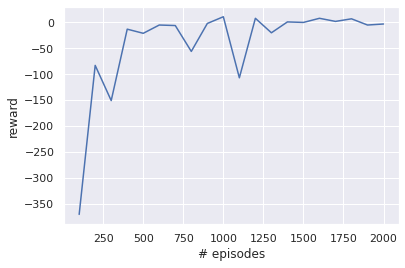

In [112]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS_Q_LEARNING

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

### 4.2 SARSA (25p)

Implementați algoritmul SARSA.

Formula de update pentru `Q` este:
$$
  Q[s_t, a] = Q[s_t, a] + \alpha(R + \gamma Q[s_{t+1}, a'] - Q[s_t, a])
$$

Unde:
- $s_t$ - starea la momentul `t`
- **a** - acțiunea aleasă la momentul `t`
- **a'** - acțiunea aleasă la momentul `t+1`, presupunând ca suntem în starea $s_{t+1}$
- $\alpha$, $\gamma$ - parametru setat înainte de rulare
- $s_{t+1}$ - starea la momentul `t+1`, după ce s-a efectua acțiunea `a`

### Train

In [142]:
REWARDS_SARSA = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    # TODO: Get the action
    # action = ...
    action = choose_action(Q, state, eps)

    while not has_ended:
        # Do the action
        next_state, reward, has_ended, _ = env.step(action)

        # TODO: Get the next_action from the next_state
        # next_action = ...
        next_action = choose_action(Q, next_state, eps)

        # Cumulate the reward for plotting
        total_reward += reward

        # TODO: Update the Q(state, action) with the new value
        # Q[state][action] = ...
        Q[state][action] += ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])
        # TODO: Go to the new state
        # state = ...
        state = next_state
        # TODO: Update the action
        # action = ...
        action = next_action


    if i % LOG_INTERVAL == 0:
        REWARDS_SARSA.append(total_reward)
        print(f"Episode: {i}")

    # TODO (BONUS): Decay eps for every DECAY_EPS_EPISODES
    # Use DECAY_EPS


# Save for plotting

Q_2 = Q
print("Training SARSA finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training SARSA finished.



In [114]:
def train_sarsa(ep_val, eps_val, gamma_val):
  REWARDS_SARSA = []

  Q = np.zeros((env.observation_space.n, env.action_space.n))

  env.seed(42)


  for i in range(1, ep_val + 1):
      state = env.reset()
      has_ended = False
      total_reward = 0

      action = choose_action(Q, state, eps_val)

      while not has_ended:
          next_state, reward, has_ended, _ = env.step(action)

          next_action = choose_action(Q, next_state, eps_val)

          total_reward += reward

          Q[state][action] += ALPHA* (reward + gamma_val * Q[next_state][next_action] - Q[state][action])

          state = next_state

          action = next_action


      if i % LOG_INTERVAL == 0:
          REWARDS_SARSA.append(total_reward)
  return REWARDS_SARSA

#### Let's check the driver

In [131]:
state = env.reset()
has_ended = False

while not has_ended:
    action = choose_action(Q, state)
    state, reward, has_ended, _ = env.step(action)
    time.sleep(0.75)
    env.render()
    print(f"Reward {reward}")
    clear_output(wait=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Reward 20


#### And the rewards

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

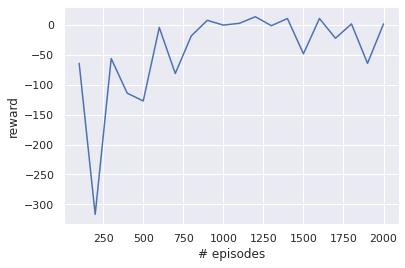

In [143]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS_SARSA

plt = sns.lineplot(x=x_points, y=y_points)
plt.set(xlabel="# episodes", ylabel="reward")

### 4.3 Results (35p)



Modificați parametrii algoritmilor (cele de la începutul Notebook-ului), faceți grafice pentru fiecare caz și explicați rezultatele obținute.

Unii (și nu numai) dintre parametrii pe care îi puteți modifica:
- numărul de episoade de antrenare
- `eps` mai mic/mare
- valoarea lui $\gamma$
- ...

In [119]:
episodes_values = np.arange(1000, 11000, 1000)
epsilon_values = np.arange(0.1, 1.1, 0.1)
gamma_values = np.arange(0.1, 1.1, 0.1)

In [118]:
def get_entry(ep_val, eps_val, gamma_val, rewards):
  entry = {}
  entry['episodes'] = ep_val
  entry['epsilon'] = eps_val
  entry['gamma'] = gamma_val
  entry['rewards'] = rewards
  return entry

In [120]:
default_episodes = NR_EPISODES
default_epsilon = EPSILON
default_gamma = GAMMA

Incep analiza algoritmilor pastrand valorile default pentru epsilon si gamma, variind initial numai valorile numarului de episoade.

In [121]:
HYPEROPT_QLEARNING_EPISODES = []
HYPEROPT_SARSA_EPISODES = []

for ep_val in episodes_values:
  print(f"Number of episodes: {ep_val}")
  reward_qlearning = train_qlearning(ep_val, default_epsilon, default_gamma)
  qlearning_entry = get_entry(ep_val, default_epsilon, default_gamma, reward_qlearning)
  HYPEROPT_QLEARNING_EPISODES.append(qlearning_entry)
  reward_sarsa = train_sarsa(ep_val, default_epsilon, default_gamma)
  sarsa_entry = get_entry(ep_val, default_epsilon, default_gamma, reward_sarsa)
  HYPEROPT_SARSA_EPISODES.append(sarsa_entry)

Number of episodes: 1000
Number of episodes: 2000
Number of episodes: 3000
Number of episodes: 4000
Number of episodes: 5000
Number of episodes: 6000
Number of episodes: 7000
Number of episodes: 8000
Number of episodes: 9000
Number of episodes: 10000


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

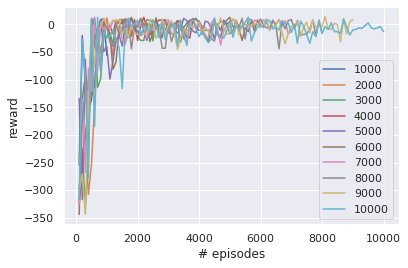

In [122]:
for entry in HYPEROPT_QLEARNING_EPISODES:
  x_points = np.arange(LOG_INTERVAL, entry["episodes"] + 1, LOG_INTERVAL)
  y_points = entry["rewards"]
  plt = sns.lineplot(x=x_points, y=y_points)
plt.legend(episodes_values)
plt.set(xlabel="# episodes", ylabel="reward")

Se observa faptul ca numarul de episoade nu influenteaza convergenta algoritmului q-learning important de mult. Altgoritmul pare sa inceapa sa convearga incepand cu valoarea numarului de episoade = 2000.

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

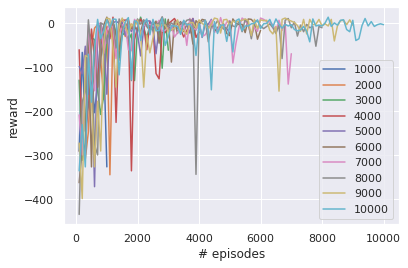

In [123]:
for entry in HYPEROPT_SARSA_EPISODES:
  x_points = np.arange(LOG_INTERVAL, entry["episodes"] + 1, LOG_INTERVAL)
  y_points = entry["rewards"]
  plt = sns.lineplot(x=x_points, y=y_points)
plt.legend(episodes_values)
plt.set(xlabel="# episodes", ylabel="reward")

Se observa faptul ca numarul de episoade nu influenteaza convergenta algoritmului.
SARSA pare sa convearga pentru valori mai mari, existand o aparenta consistenta a valorile in cazul cu 10000 de episoade, insa performantele algoritmului nu se schimba substantial in functie de numarul de episoade existent.

Tinand cont de observatiile de mai sus, continui analiza cu numarul de episoade = 2000, numar de la care Q_LEARNING incepe sa convearga, si numar care nu influenteaza perfomanta SARSA.
Continui analiza prin a varia valoarea lui epsilon.

In [124]:
HYPEROPT_QLEARNING_EPSILON = []
HYPEROPT_SARSA_EPSILON = []

for eps_val in epsilon_values:
  print(f"Value of epsilon: {eps_val}")
  reward_qlearning = train_qlearning(default_episodes, eps_val, default_gamma)
  qlearning_entry = get_entry(default_episodes, eps_val, default_gamma, reward_qlearning)
  HYPEROPT_QLEARNING_EPSILON.append(qlearning_entry)
  reward_sarsa = train_sarsa(default_episodes, eps_val, default_gamma)
  sarsa_entry = get_entry(default_episodes, eps_val, default_gamma, reward_sarsa)
  HYPEROPT_SARSA_EPSILON.append(sarsa_entry)

Value of epsilon: 0.1
Value of epsilon: 0.2
Value of epsilon: 0.30000000000000004
Value of epsilon: 0.4
Value of epsilon: 0.5
Value of epsilon: 0.6
Value of epsilon: 0.7000000000000001
Value of epsilon: 0.8
Value of epsilon: 0.9
Value of epsilon: 1.0


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

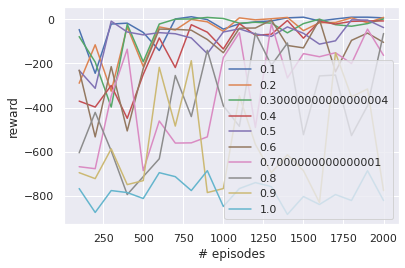

In [125]:
for entry in HYPEROPT_QLEARNING_EPSILON:
  x_points = np.arange(LOG_INTERVAL, entry["episodes"] + 1, LOG_INTERVAL)
  y_points = entry["rewards"]
  plt = sns.lineplot(x=x_points, y=y_points)
plt.legend(epsilon_values)
plt.set(xlabel="# episodes", ylabel="reward")

Se observa ca, o data cu cresterea valorii lui epsilon in cadrul Q_Learning, algoritmul converge mai greu. Valoarea de 0.2 este cea mai buna in acest caz, fiind si cea default.

[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

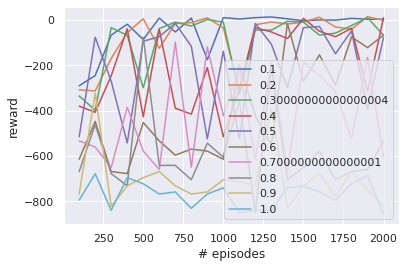

In [127]:
for entry in HYPEROPT_SARSA_EPSILON:
  x_points = np.arange(LOG_INTERVAL, entry["episodes"] + 1, LOG_INTERVAL)
  y_points = entry["rewards"]
  plt = sns.lineplot(x=x_points, y=y_points)
plt.legend(epsilon_values)
plt.set(xlabel="# episodes", ylabel="reward")

Se observa ca, o data cu cresterea valorii lui epsilon in cadrul Sarsa, algoritmul converge mai greu. Valoarea de 0.2 pentru epsilon este cea mai buna in acest caz, fiind si cea default.
Continui testarea, variind de aceasta data valorile pentru gamma, tinand cont de rularile anterioare.

In [128]:
HYPEROPT_QLEARNING_GAMMA = []
HYPEROPT_SARSA_GAMMA = []

for gamma_val in gamma_values:
  print(f"Value of gamma: {gamma_val}")
  reward_qlearning = train_qlearning(default_episodes, default_epsilon, gamma_val)
  qlearning_entry = get_entry(default_episodes, default_epsilon, gamma_val, reward_qlearning)
  HYPEROPT_QLEARNING_GAMMA.append(qlearning_entry)
  reward_sarsa = train_sarsa(default_episodes, default_epsilon, gamma_val)
  sarsa_entry = get_entry(default_episodes, default_epsilon, gamma_val, reward_sarsa)
  HYPEROPT_SARSA_GAMMA.append(sarsa_entry)

Value of gamma: 0.1
Value of gamma: 0.2
Value of gamma: 0.30000000000000004
Value of gamma: 0.4
Value of gamma: 0.5
Value of gamma: 0.6
Value of gamma: 0.7000000000000001
Value of gamma: 0.8
Value of gamma: 0.9
Value of gamma: 1.0


[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

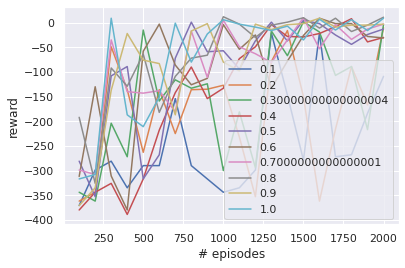

In [129]:
for entry in HYPEROPT_QLEARNING_GAMMA:
  x_points = np.arange(LOG_INTERVAL, entry["episodes"] + 1, LOG_INTERVAL)
  y_points = entry["rewards"]
  plt = sns.lineplot(x=x_points, y=y_points)
plt.legend(gamma_values)
plt.set(xlabel="# episodes", ylabel="reward")

Se observa ca pentru valorile foarte mari ale lui gamma, algoritmul converge. Astfel, cei mai buni parametrii determinati pentru Q_learning:


*   episodes = 2000
*   epsilon = 0.2
*   gamma = 0.7-1



[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

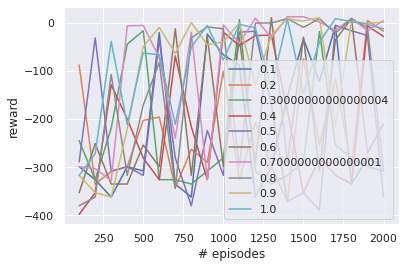

In [130]:
for entry in HYPEROPT_SARSA_GAMMA:
  x_points = np.arange(LOG_INTERVAL, entry["episodes"] + 1, LOG_INTERVAL)
  y_points = entry["rewards"]
  plt = sns.lineplot(x=x_points, y=y_points)
plt.legend(gamma_values)
plt.set(xlabel="# episodes", ylabel="reward")

Se observa ca pentru valorile foarte mari ale lui gamma, algoritmul converge. Astfel, cei mai buni parametrii determinati pentru SARSA:


*   episodes = 2000
*   epsilon = 0.2
*   gamma = 0.7-0.9

#### 4.4 And something more... (10p)

##### A simple move (5p)


Dorim să vedem importanța reward-ului și a stării.

Modificați celula de antrenare pentru una dintre metode astfel încât reward-ul pentru o **mutare simplă** să fie 0, (acum este -1). Refaceți graficul metodei alese și trageți concluziile.


In [132]:
REWARDS_Q_LEARNING_2 = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)

for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        action = choose_action(Q, state, eps)

        next_state, reward, has_ended, _ = env.step(action)
        if reward == -1:
          reward = 0

        total_reward += reward

        next_action = get_best_action(Q, next_state, env.action_space)
        Q[state][action] +=  ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])

        state = next_state

    if i % LOG_INTERVAL == 0:
        REWARDS_Q_LEARNING_2.append(total_reward)
        print(f"Episode: {i}")

Q_2 = Q
print("Training Q-Learning finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training Q-Learning finished.



[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

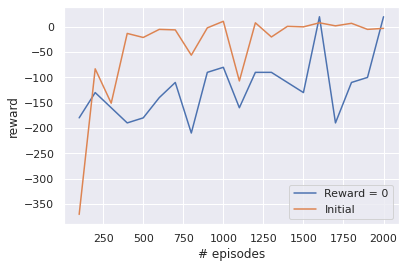

In [133]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS_Q_LEARNING_2

plt = sns.lineplot(x=x_points, y=y_points)
plt = sns.lineplot(x=x_points, y=REWARDS_Q_LEARNING)
plt.legend(['Reward = 0', 'Initial'])
plt.set(xlabel="# episodes", ylabel="reward")

Se observa faptul ca algoritmul nu converge, deoarece observand ca nu i se aplica nicio sanctiune mare la alegerea gresita a unei directii, el va continua sa o considere corecta.

##### A little less space (5p)

**Starea** are valori discrete (500 de valori posibile), iar aceasta este encodată folosind metoda d [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L128).

Rescrieți codul astfel încât starea să fie encodată folosind:
$$
(((taxi\_row * 5) + taxi\_column) * 5 + pass\_loc) * 2 + destination
$$
Antrenați unul dintre algoritmi, faceți graficul și explicați rezultatul.

**Atenție!** Trebuie să și modificați cum arată Q (forma matricei).

Hint: Decodarea stării este [aici](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py#L139)


In [134]:
import types
env2 = gym.make('Taxi-v3')

def _encode(self, taxi_row, taxi_col, pass_loc, dest_idx):
  i = taxi_row
  i *= 5
  i += taxi_col
  i *= 5
  i += pass_loc
  i *= 2
  i += dest_idx
  return i

env2.encode = types.MethodType(_encode, env2)


In [135]:
REWARDS_Q_LEARNING_3 = []
eps = EPSILON

# Table used to keep the utilities for state-action
Q = np.zeros((env2.observation_space.n, env2.action_space.n))

env2.seed(42)

for i in range(1, NR_EPISODES + 1):
    state = env2.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        action = choose_action(Q, state, eps)

        next_state, reward, has_ended, _ = env2.step(action)

        total_reward += reward

        next_action = get_best_action(Q, next_state, env2.action_space)
        Q[state][action] +=  ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])

        state = next_state

    if i % LOG_INTERVAL == 0:
        REWARDS_Q_LEARNING_3.append(total_reward)
        print(f"Episode: {i}")

Q_3 = Q
print("Training Q-Learning finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training Q-Learning finished.



[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

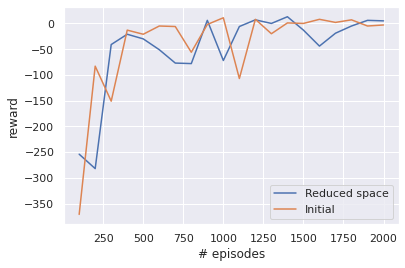

In [136]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS_Q_LEARNING_3

plt = sns.lineplot(x=x_points, y=y_points)
plt = sns.lineplot(x=x_points, y=REWARDS_Q_LEARNING)
plt.legend(['Reduced space', 'Initial'])
plt.set(xlabel="# episodes", ylabel="reward")

## 5 BONUS: Some decay on the way (10p)

Analizați ce se întâmplă daca scadeți treptat `eps`, pe măsura antrenării. 

Intuitiv, dorim ca la începutul antrenării agentul să **exploreze** cât mai mult posibil și să atingă un număr mare de stări (în exemplul nostru cu taxiul, nu avem așa multe stări, dar sunt jocuri în care spațiul stărilor poate fi mai mare).

De asemenea, pe măsură ce continuăm antrenarea, dorim ca taximetristul să înceapă să **exploateze** mai mult stările cunoscute cu o utilitate mare.



In [137]:
REWARDS_Q_LEARNING_4 = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)

for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    while not has_ended:
        action = choose_action(Q, state, eps)

        next_state, reward, has_ended, _ = env.step(action)

        total_reward += reward

        next_action = get_best_action(Q, next_state, env.action_space)
        Q[state][action] +=  ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])

        state = next_state

    if i % LOG_INTERVAL == 0:
        REWARDS_Q_LEARNING_4.append(total_reward)
        print(f"Episode: {i}")

    if i % DECAY_EPS_EPISODES == 0:
      eps *= DECAY_EPS

Q_4 = Q
print("Training Q-Learning finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training Q-Learning finished.



[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

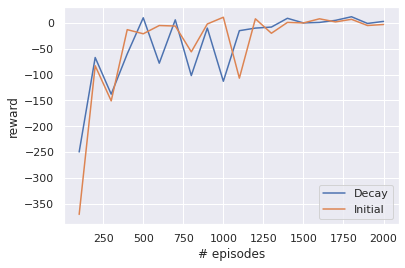

In [138]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS_Q_LEARNING_4
plt = sns.lineplot(x=x_points, y=y_points)
plt = sns.lineplot(x=x_points, y=REWARDS_Q_LEARNING)
plt.legend(['Decay', 'Initial'])
plt.set(xlabel="# episodes", ylabel="reward")


Se observa faptul ca prin scaderea valorii lui epsilon, algoritmul incepe sa convearga de la aproximativ 1000 de episoade spre deosebire de valoarea initiala.

In [145]:
REWARDS_SARSA_2 = []
eps = EPSILON

Q = np.zeros((env.observation_space.n, env.action_space.n))

env.seed(42)


for i in range(1, NR_EPISODES + 1):
    state = env.reset()
    has_ended = False
    total_reward = 0

    action = choose_action(Q, state, eps)

    while not has_ended:
        next_state, reward, has_ended, _ = env.step(action)

        next_action = choose_action(Q, next_state, eps)

        total_reward += reward

        Q[state][action] += ALPHA * (reward + GAMMA * Q[next_state][next_action] - Q[state][action])

        state = next_state

        action = next_action


    if i % LOG_INTERVAL == 0:
        REWARDS_SARSA_2.append(total_reward)
        print(f"Episode: {i}")

    if i % DECAY_EPS_EPISODES == 0:
      eps *= DECAY_EPS


Q_2 = Q
print("Training SARSA finished.\n")

Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Training SARSA finished.



[Text(0, 0.5, 'reward'), Text(0.5, 0, '# episodes')]

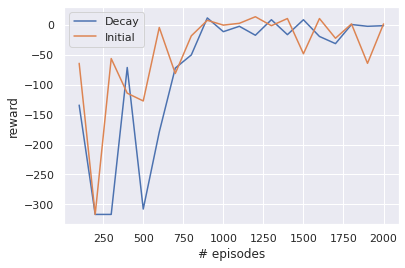

In [146]:
x_points = np.arange(LOG_INTERVAL, NR_EPISODES + 1, LOG_INTERVAL)
y_points = REWARDS_SARSA_2

plt = sns.lineplot(x=x_points, y=y_points)
plt = sns.lineplot(x=x_points, y= REWARDS_SARSA)
plt.legend(['Decay', 'Initial'])
plt.set(xlabel="# episodes", ylabel="reward")

Se observa faptul ca prin scaderea valorii lui epsilon, algoritmul incepe sa convearga de la aproximativ 750 de episoade spre deosebire de valoarea initiala.